<a href="https://colab.research.google.com/github/kiuwuw/Pembelajaran-Mesin-Rahmad-Dwirizki-Olders-2211533005/blob/main/Hierarchical-Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

Mengimpor pustaka yang diperlukan untuk analisis dan visualisasi data

In [ ]:
raw_df = pd.read_csv('CC GENERAL.csv')
raw_df = raw_df.drop('CUST_ID', axis = 1)
raw_df.fillna(method ='ffill', inplace = True)
raw_df.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


Memuat data dari file 'CC GENERAL.csv', menghapus kolom 'CUST_ID', mengisi nilai-nilai yang kosong dengan metode forward fill, dan menampilkan 2 baris pertama dari hasil akhir DataFrame yang sudah dimodifikasi

In [ ]:
# Standardize data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(raw_df)

# Normalizing the Data
normalized_df = normalize(scaled_df)

# Converting the numpy array into a pandas DataFrame
normalized_df = pd.DataFrame(normalized_df)

# Reducing the dimensions of the data
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(normalized_df)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

X_principal.head(2)

,P1,P2
0,-0.489949,-0.679977
1,-0.519098,0.544825


Kode ini melakukan standarisasi data, normalisasi, reduksi dimensi menggunakan PCA, dan kemudian menampilkan hasilnya dalam bentuk DataFrame pandas dengan dua komponen utama ('P1' dan 'P2').

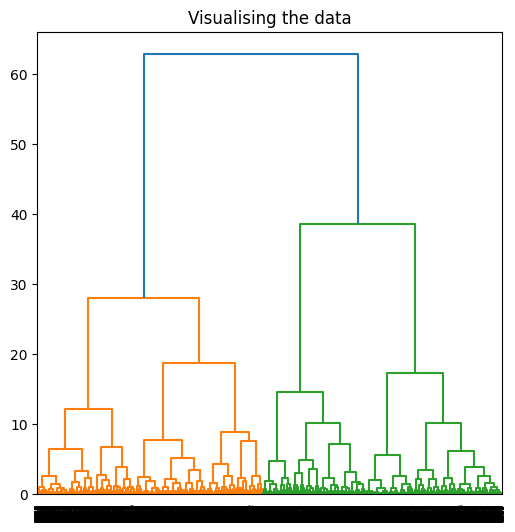

In [ ]:
plt.figure(figsize =(6, 6))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

Mendapatkan sebuah plot dendrogram yang menggunakan metode ward untuk menggabungkan kluster berdasarkan data yang telah direduksi dimensinya menggunakan PCA sebelumnya. Dendrogram memberikan pandangan visual tentang bagaimana pengelompokan hierarkis data dilakukan berdasarkan jarak antar titik data.

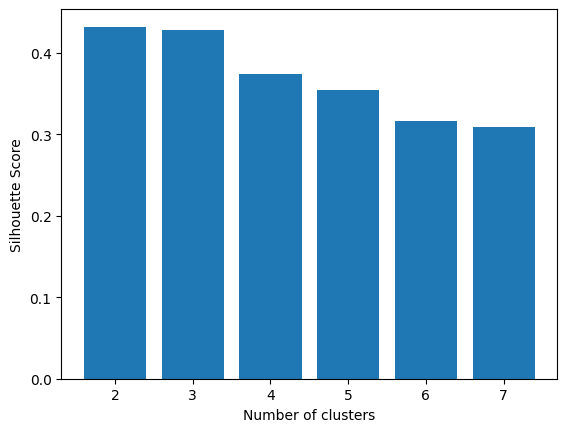

In [ ]:
silhouette_scores = []

for n_cluster in range(2, 8):
    silhouette_scores.append(
        silhouette_score(X_principal, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal)))

# Plotting a bar graph to compare the results
k = [2, 3, 4, 5, 6,7]
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Silhouette Score', fontsize = 10)
plt.show()

Memvisualisasikan nilai Silhouette Score untuk berbagai jumlah klaster, membantu Anda untuk memilih jumlah klaster yang optimal berdasarkan metrik evaluasi tersebut

In [ ]:
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X_principal)

AgglomerativeClustering(n_clusters=3)

Untuk melakukan clustering hierarkis dengan 3 klaster pada data yang telah direduksi dimensinya menggunakan PCA (X_principal), dan mendapatkan label klaster untuk setiap titik data tersebut.

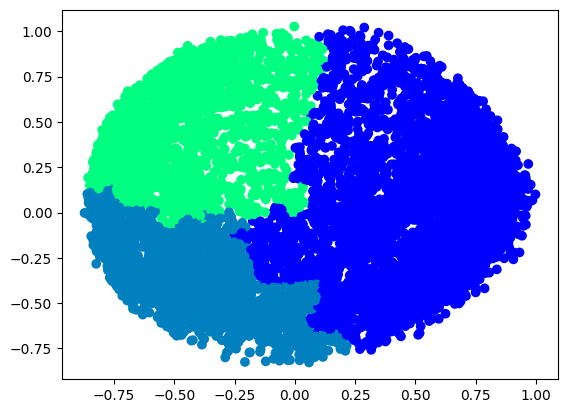

In [ ]:
# Visualizing the clustering
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = AgglomerativeClustering(n_clusters = 3).fit_predict(X_principal), cmap =plt.cm.winter)
plt.show()

Memvisualisasikan hasil clustering hierarkis dengan 3 klaster pada data yang telah direduksi dimensinya menggunakan PCA. Scatter plot menunjukkan bagaimana titik-titik data dikelompokkan berdasarkan klaster yang berbeda dalam ruang dua dimensi yang dihasilkan oleh PCA.